## **Problem 2**

### **2.1** Design a PySpark program to do logistic regression using "LogisticRegression" in "pyspark.ml.classification"

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression


In [2]:
# Initializing a Spark session
spark = SparkSession.builder.master('local').appName("data_logistic_regression").config('spark.some.config.option','some-value').getOrCreate()

22/11/05 17:14:21 WARN Utils: Your hostname, Lais-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.2.7 instead (on interface en0)
22/11/05 17:14:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/05 17:14:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Read the data set
data = spark.read.csv("data_logistic_regression.csv", inferSchema = True, header = True)
data.printSchema()

root
 |-- x1: double (nullable = true)
 |-- x2: double (nullable = true)
 |-- label: integer (nullable = true)



In [4]:
# Using VectorAssembler to transform all features into a vector
assembler = VectorAssembler(inputCols = ['x1','x2'], outputCol='features')


In [5]:
# Selecting input and output columns
output = assembler.transform(data)
finalised_data = output.select('features', 'label')
finalised_data.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[75.01365839,30.6...|    0|
|[55.48216114,35.5...|    0|
|[95.86155507,38.2...|    0|
|[93.1143888,38.80...|    0|
|[56.2538175,39.26...|    0|
|[82.36875376,40.6...|    0|
|[66.56089447,41.0...|    0|
|[74.78925296,41.5...|    0|
|[60.45555629,42.5...|    0|
|[82.22666158,42.7...|    0|
|[67.37202755,42.8...|    0|
|[32.72283304,43.3...|    0|
|[34.21206098,44.2...|    0|
|[80.19018075,44.8...|    1|
|[89.84580671,45.3...|    1|
|[94.83450672,45.6...|    1|
|[51.04775177,45.8...|    0|
|[67.94685548,46.6...|    0|
|[51.54772027,46.8...|    0|
|[35.28611282,47.0...|    0|
+--------------------+-----+
only showing top 20 rows



In [6]:
# Split the data set into training and testing sets: 
train, test = finalised_data.randomSplit([0.7, 0.3])

In [7]:
# Building the model
lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=5)
lrmodel = lr.fit(train)
predictions = lrmodel.transform(test)

22/11/05 17:14:42 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
22/11/05 17:14:42 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/11/05 17:14:42 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [8]:
lrmodel_summary = lrmodel.summary
lrmodel_summary.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[30.05882245,49.5...|  0.0|[7.82908248002541...|[0.99960216785637...|       0.0|
|[32.72283304,43.3...|  0.0|[8.27168405699651...|[0.99974441095050...|       0.0|
|[33.91550011,98.8...|  0.0|[0.05836549380613...|[0.51458723269841...|       0.0|
|[34.18364003,75.2...|  0.0|[3.41685118670861...|[0.96822704600124...|       0.0|
|[35.28611282,47.0...|  0.0|[7.29101807738751...|[0.99931883056458...|       0.0|
|[38.7858038,64.99...|  0.0|[4.09257274902293...|[0.98357796293092...|       0.0|
|[39.53833914,98.9...|  0.0|[-0.9315185091289...|[0.28261674350130...|       1.0|
|[40.45755098,97.5...|  1.0|[-0.8866755278707...|[0.29179635790692...|       1.0|
|[42.07545454,78.8...|  0.0|[1.52516692192633...|[0.82129807637659...|       0.0|
|[44.66826172,66

In [9]:
lrmodel_summary.predictions.describe().show()

+-------+------------------+-------------------+
|summary|             label|         prediction|
+-------+------------------+-------------------+
|  count|                59|                 59|
|   mean|0.5423728813559322|  0.576271186440678|
| stddev|0.5024777880939232|0.49839016119517676|
|    min|               0.0|                0.0|
|    max|               1.0|                1.0|
+-------+------------------+-------------------+



### **2.2** Draw a ROC curve using "matplotlib.pyplot". Its x-axis is "False Positive Rate", and y-axis is  "True Positive Rate".

In [10]:
# Evaluating the model

# Model Accuracy
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(predictions.count())
print("Accuracy : ",accuracy)

Accuracy :  0.8095238095238095


In [11]:
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9500000000000001


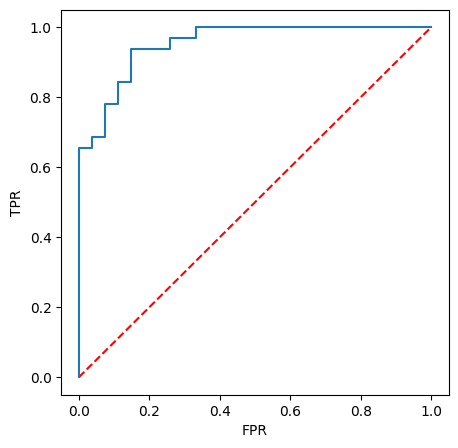

In [12]:
# Drawing ROC curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lrmodel.summary.roc.select('FPR').collect(),
         lrmodel.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

From the above results, the accuracy score of the model is 0.809 meaning that the model can predict correctly 80.9 percent of classified data instance over the total number of data instances. It can be seen that the model is doing good job of identifiying the class labels. Besides, the higher the AUC which a model can achieve, the better the model is at distinguishing between classes. In this case, the model achieved AUC of 0.95 (close to 1) inferring that it performs well at classifying between class labels 0 and 1. 
